In [3]:
using Plots
using JLD2

In [44]:
#data for TWA Sz and Intensity
@load "DickeTWA_n=8.jld2" Sz_vals W
Sz_vals8TWA = Sz_vals
W8 = W
@load "DickeTWA_n=16.jld2" Sz_vals W
Sz_vals16TWA = Sz_vals
W16 = W
@load "DickeTWA_n=32.jld2" Sz_vals W
Sz_vals32TWA = Sz_vals
W32 = W

@load "DickeTWA_n=64.jld2" Sz_vals W
Sz_vals64TWA = Sz_vals
W64 = W

#data for direct sim Sz
@load "Sz_vals_N_8.jld2" Sz_vals_normalized
Sz_vals8 = Sz_vals_normalized

@load "Sz_vals_N_16.jld2" Sz_vals_normalized
Sz_vals16 = Sz_vals_normalized

@load "Sz_vals_N_32.jld2" Sz_vals_normalized
Sz_vals32 = Sz_vals_normalized

@load "Sz_vals_N_64.jld2" Sz_vals_normalized
Sz_vals64 = Sz_vals_normalized


#Data for direct sim intensity
@load "gamma_vals_N_8.jld2" γ_normalized
γ_normalized8 = γ_normalized

@load "gamma_vals_N_16.jld2" γ_normalized
γ_normalized16 = γ_normalized

@load "gamma_vals_N_32.jld2" γ_normalized
γ_normalized32 = γ_normalized

@load "gamma_vals_N_64.jld2" γ_normalized
γ_normalized64 = γ_normalized

@load "time.jld2" t
t_scaled = t

400-element LinRange{Float64, Int64}:
 0.0, 0.0125313, 0.0250627, 0.037594, …, 4.96241, 4.97494, 4.98747, 5.0

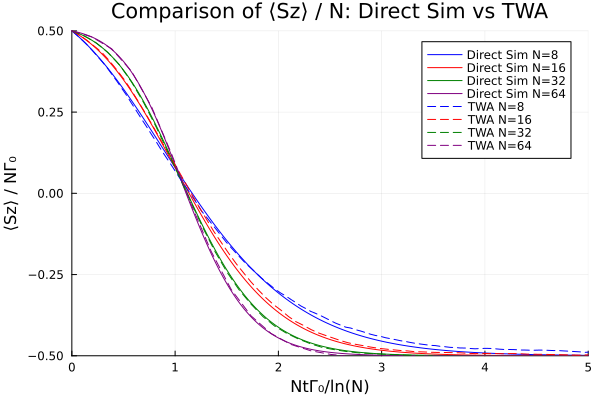

"c:\\Users\\troll\\OneDrive\\Documents\\TWA\\TWA_direct_Sz.png"

In [62]:
p_Sz = plot(xlabel="NtΓ₀/ln(N)", ylabel="⟨Sz⟩ / NΓ₀", title="Comparison of ⟨Sz⟩ / N: Direct Sim vs TWA", xlim=(0,5), ylim=(-0.5,0.5))

plot!(p_Sz, t_scaled, Sz_vals8, label="Direct Sim N=8", color=:blue)
plot!(p_Sz, t_scaled, Sz_vals16, label="Direct Sim N=16", color=:red)
plot!(p_Sz, t_scaled, Sz_vals32, label="Direct Sim N=32", color=:green)
plot!(p_Sz, t_scaled, Sz_vals64, label="Direct Sim N=64", color=:purple)

plot!(p_Sz, t_scaled*8/log(8), Sz_vals8TWA/8, label="TWA N=8", color=:blue, linestyle=:dash)
plot!(p_Sz, t_scaled*16/log(16), Sz_vals16TWA/16, label="TWA N=16", color=:red, linestyle=:dash)
plot!(p_Sz, t_scaled*32/log(32), Sz_vals32TWA/32, label="TWA N=32", color=:green, linestyle=:dash)
plot!(p_Sz, t_scaled*64/log(64), Sz_vals64TWA/64, label="TWA N=64", color=:purple, linestyle=:dash)

display(p_Sz)
savefig("TWA_direct_Sz.png")


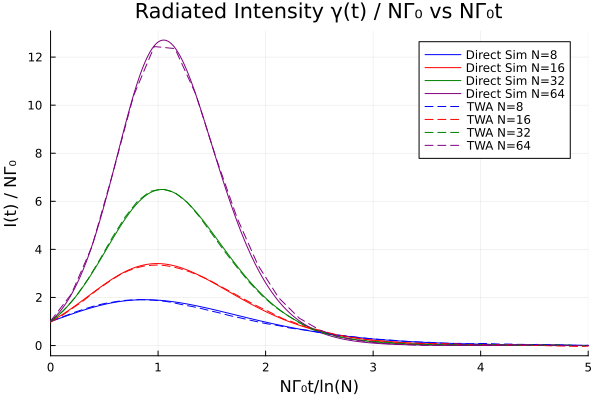

"c:\\Users\\troll\\OneDrive\\Documents\\TWA\\intensity.png"

In [61]:
p_intensity = plot(xlim=(0, 5), xlabel="NΓ₀t/ln(N)", ylabel="I(t) / NΓ₀", title="Radiated Intensity γ(t) / NΓ₀ vs NΓ₀t")

# # Plot direct simulation results for intensity
plot!(p_intensity, t_scaled, γ_normalized8, label="Direct Sim N=8", color=:blue)
plot!(p_intensity, t_scaled, γ_normalized16, label="Direct Sim N=16", color=:red)
plot!(p_intensity, t_scaled, γ_normalized32, label="Direct Sim N=32", color=:green)
plot!(p_intensity, t_scaled, γ_normalized64, label="Direct Sim N=64", color=:purple)

plot!(p_intensity, t_scaled*8/log(8), W8/8, label="TWA N=8", color=:blue, linestyle=:dash)
plot!(p_intensity, t_scaled*16/log(16), W16/16, label="TWA N=16", color=:red, linestyle=:dash)
plot!(p_intensity, t_scaled*32/log(32), W32/32, label="TWA N=32", color=:green, linestyle=:dash)
plot!(p_intensity, t_scaled*64/log(64), W64/64, label="TWA N=64", color=:purple, linestyle=:dash)

display(p_intensity)
savefig("intensity.png")


In [66]:
@load "TWA+actual.jld2" t sz sigma_z

3-element Vector{Symbol}:
 :t
 :sz
 :sigma_z

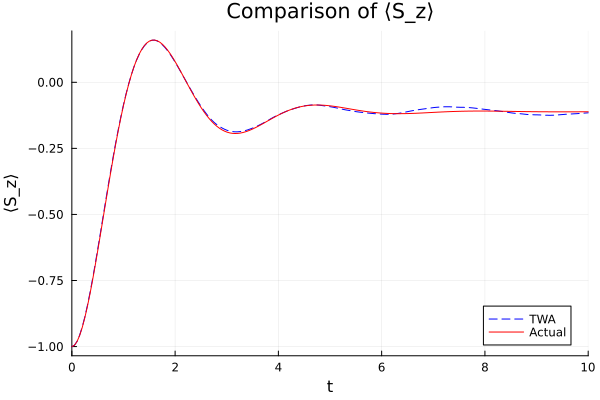

"c:\\Users\\troll\\OneDrive\\Documents\\TWA\\Sz.png"

In [73]:
# Plotting TWA and actual sz values on the same plot
# Assuming you already have `t`, `sz`, and `sigma_z` loaded from the file

# Create or reuse an existing plot for Sz comparison
p_Sz = plot(xlabel="t", ylabel="⟨S_z⟩", title="Comparison of ⟨S_z⟩", xlim=(0.0,10))

# Plot the sz from TWA
plot!(p_Sz, t, sz, label="TWA", linestyle=:dash, color=:blue)

# Plot the actual sigma_z
plot!(p_Sz, t, sigma_z, label="Actual", linestyle=:solid, color=:red)

# Show the plot
display(p_Sz)
savefig("Sz.png")